## 4.1 Landau level wave functions and probability density (square of the ewave function)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [21]:
hbar = 1.054_571_817e-34
e = 1.6e-19
m = 9.1e-31

B = hbar / e  # Arbitrary value
wc = e * B / m

def wave_function0(x: float) -> float:
    return np.power(1 / math.pi, 0.25) * np.exp(-(x ** 2) / 2 )

def wave_function1(x: float) -> float:
    return np.power(1 / (4 * math.pi), 0.25) * np.exp(-(x ** 2) / 2 ) * x


x_ = np.arange(-15, 15, 0.01)

wave_array = np.zeros((100, len(x_)))

wave_array[0] = wave_function0(x_)
wave_array[1] = wave_function1(x_)

for n in range(2, 100):
    wave_array[n] = np.sqrt(2 / n) * (x_ * wave_array[n-1] - np.sqrt((n - 1) / 2) * wave_array[n-2])

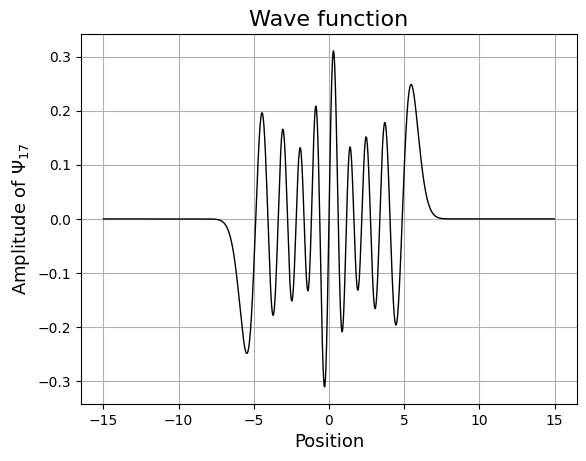

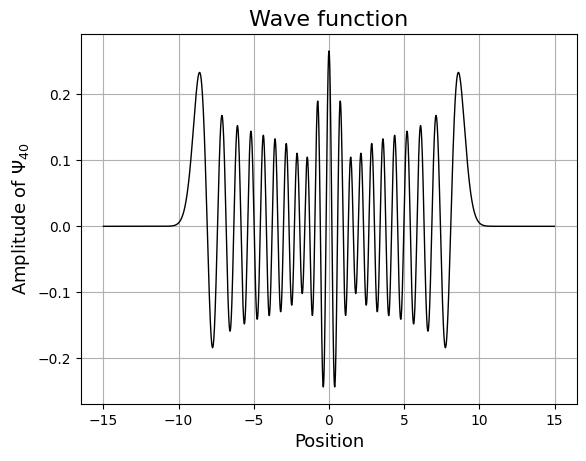

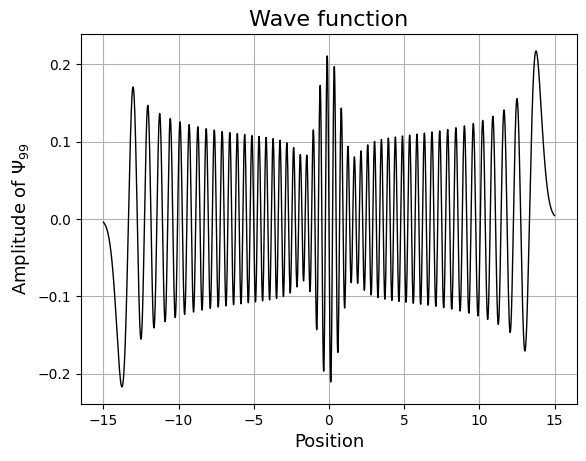

In [25]:
for idx in range(17, 100):

    if idx not in (17, 40, 99):
        continue

    plt.title(f'Wave function', fontsize='16')
    plt.plot(x_, wave_array[idx], label=f'T(E)', color='black', linewidth=1)

    plt.xlabel(r'Position', fontsize='13')
    plt.ylabel(r'Amplitude of $\Psi_{{{:2d}}}$'.format(idx), fontsize='13')
    plt.grid()
    plt.show()

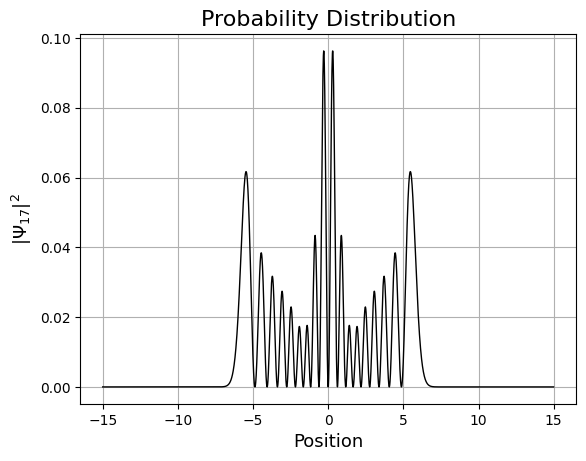

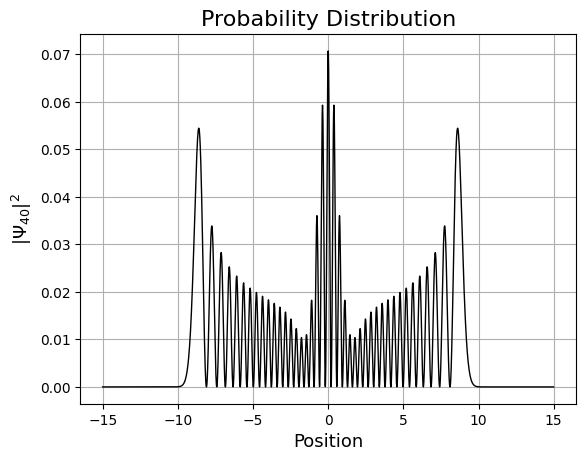

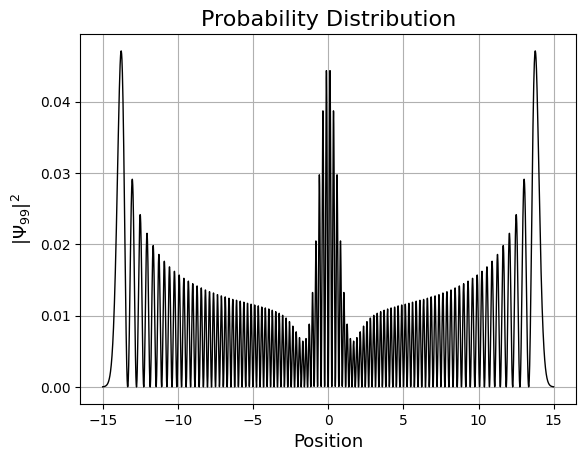

In [29]:
for idx in range(17, 100):

    if idx not in (17, 40, 99):
        continue

    plt.title(f'Probability Distribution', fontsize='16')
    plt.plot(x_, wave_array[idx] * wave_array[idx], label=f'T(E)', color='black', linewidth=1)

    plt.xlabel(r'Position', fontsize='13')
    plt.ylabel(r'$|\Psi_{{{:2d}}}|^2$'.format(idx), fontsize='13')
    plt.grid()
    plt.show()

1. The same thing but without simplifying

In [5]:
# hbar = 6.582e-16
hbar = 1.054_571_817e-34
e = 1.6e-19

# B = 10  # Arbitrary value
B = hbar / e  # Arbitrary value

m = 9.1e-31
wc = e * B / m

beta = m * wc / hbar  # TODO: From where do we take these values?

print(beta)

def exponential(zeta: float) -> float:
    return np.exp(-(zeta ** 2) / (2 * beta))  # TODO: Does the minus sign goes here?


def wave_function0(zeta: float) -> float:
    return np.power(beta / math.pi, 0.25) * exponential(zeta) 


def wave_function1(zeta: float) -> float:
    return np.power(1 / (4 * math.pi * beta), 0.25) * exponential(zeta) * zeta


def zeta(x):
    return beta * x


x_ = np.arange(-200, 200, 0.001)
zeta_ = zeta(x_)

wave_array = np.zeros((100, len(x_)))

wave_array[0] = wave_function0(zeta_)
wave_array[1] = wave_function1(zeta_)

for n in range(2, 100):
    wave_array[n] = math.sqrt(2 / n) * (zeta_ * wave_array[n-1] - math.sqrt((n - 1) / 2) * wave_array[n-2])


1.0


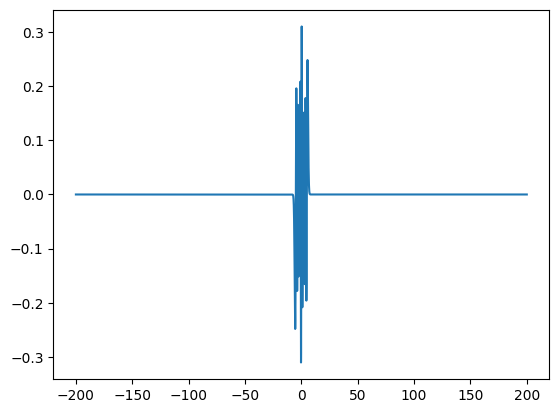

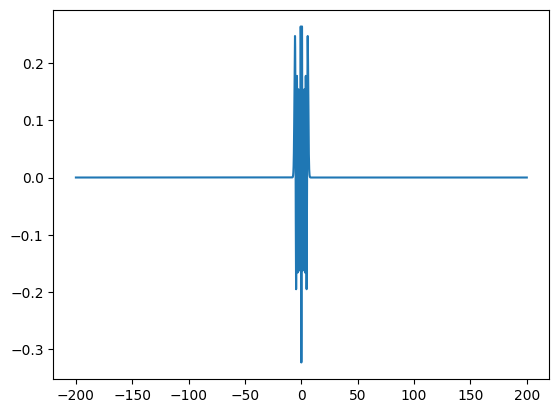

In [6]:
for idx in range(17, 19):
    plt.plot(x_, wave_array[idx])
    plt.show()